In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

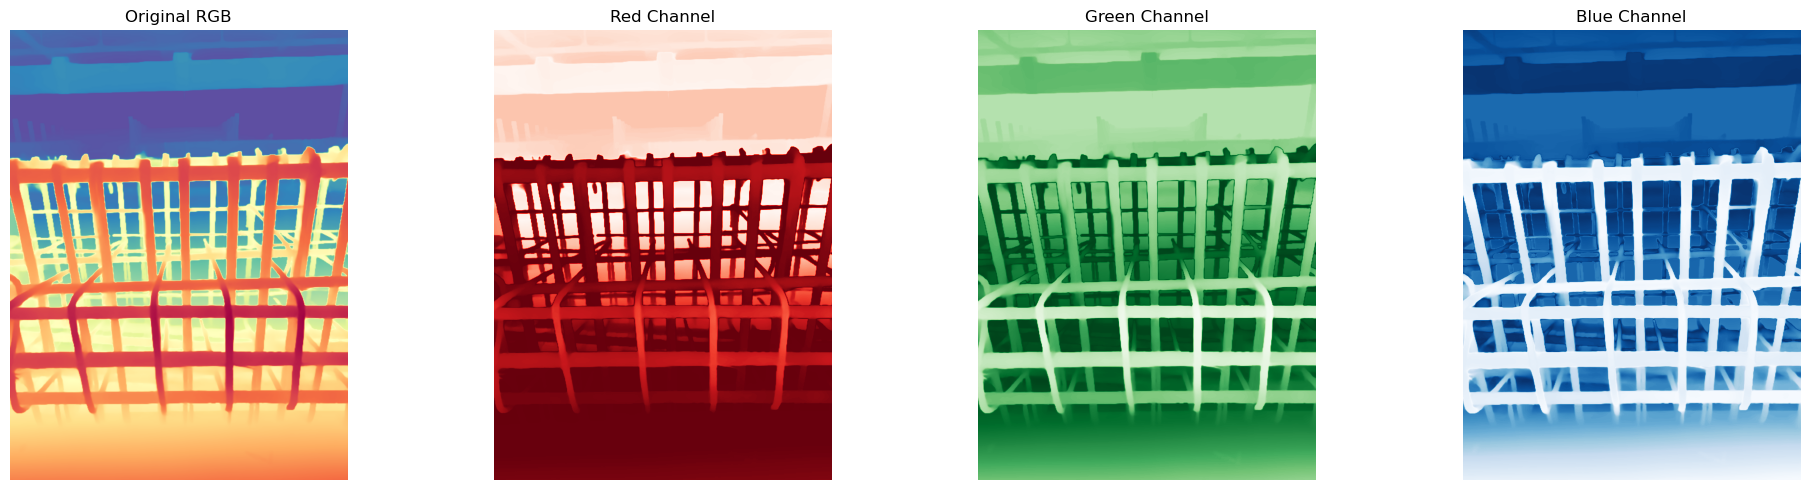

In [51]:
depth_map = cv2.imread('depth_map_comparison/0.5m_pred/depth_anything_vitl/20250502_132954.png', cv2.IMREAD_COLOR)
depth_map = cv2.cvtColor(depth_map, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
depth_map = cv2.normalize(depth_map, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

red_channel = depth_map[:,:,0]
green_channel = depth_map[:,:,1] 
blue_channel = depth_map[:,:,2]

# Let's examine which channel has the most depth variation
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(depth_map)
plt.title('Original RGB')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(red_channel, cmap='Reds')
plt.title('Red Channel')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(green_channel, cmap='Greens')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(blue_channel, cmap='Blues')
plt.title('Blue Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

It seems that blue has the better representation of segmenting the closer bar. Let's try to get the shape of the bar by setting a threshold

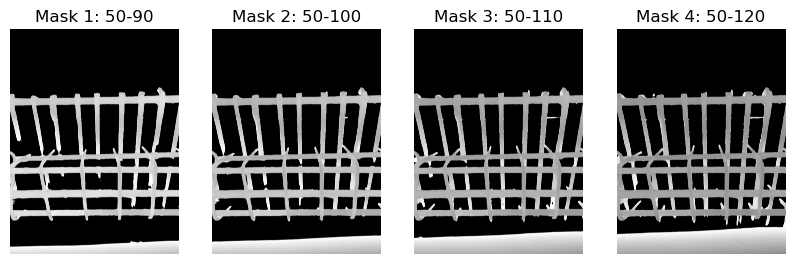

In [72]:
plt.figure(figsize=(10, 4))
thresholds = [[50, 90], [50, 100], [50, 110], [50, 120]]
for i in range(len(thresholds)):
    lower_bound = thresholds[i][0]
    upper_bound = thresholds[i][1]
    
    # Create a mask for the current threshold range
    mask = (blue_channel >= lower_bound) & (blue_channel < upper_bound)
    
    # Create a segmented image based on the mask
    segment = np.zeros_like(blue_channel)
    segment[mask] = blue_channel[mask]
    
    plt.subplot(1, len(thresholds), i + 1)
    plt.imshow(segment, cmap='gray')
    plt.title(f'Mask {i + 1}: {thresholds[i][0]}-{thresholds[i][1]}')
    plt.axis('off')

I think by setting the threshold to be 50 to 110 has the better representation of the bar, it catches the two layers of bar but without too many miscellaneous details.